In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')

In [3]:
df.shape

(167, 10)

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot: xlabel='child_mort', ylabel='Count'>

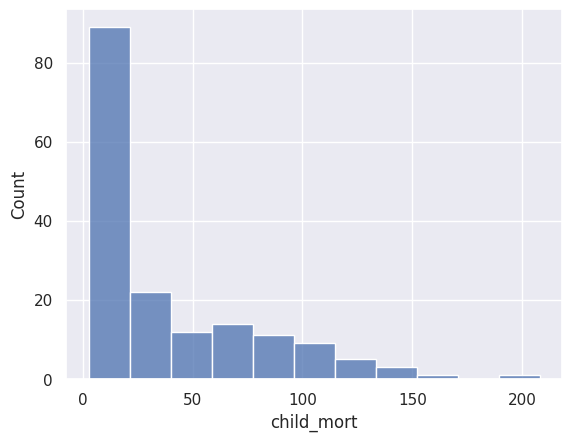

In [8]:
sns.histplot(df['child_mort'])

In [11]:
country_child_mort=df[['country','child_mort']].groupby('country').mean()

In [17]:
country_child_mort=country_child_mort.sort_values(by=['child_mort'],ascending=False)

In [28]:
top_10_countries=country_child_mort.iloc[0:10,:]

<AxesSubplot: xlabel='country', ylabel='child_mort'>

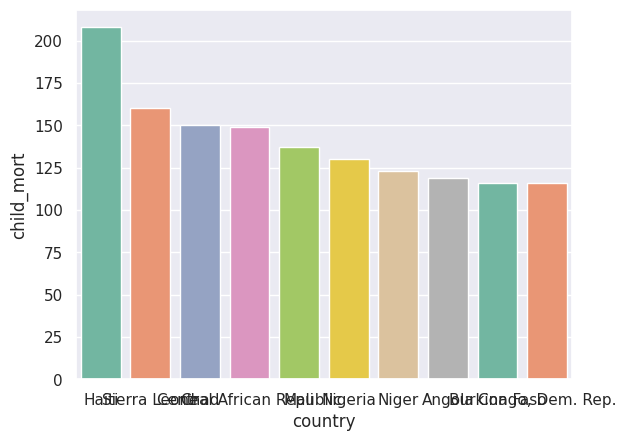

In [29]:
sns.barplot(x=top_10_countries.index,y='child_mort',data=top_10_countries,palette='Set2')

In [30]:
top_10_countries.index

Index(['Haiti', 'Sierra Leone', 'Chad', 'Central African Republic', 'Mali',
       'Nigeria', 'Niger', 'Angola', 'Burkina Faso', 'Congo, Dem. Rep.'],
      dtype='object', name='country')

In [43]:
country_life_expec=df.sort_values(by=['life_expec'],ascending=True)

In [44]:
country_life_expec=country_life_expec.iloc[:10,:]

In [45]:
country_life_expec.country

66                        Haiti
87                      Lesotho
31     Central African Republic
166                      Zambia
94                       Malawi
137                South Africa
106                  Mozambique
132                Sierra Leone
64                Guinea-Bissau
0                   Afghanistan
Name: country, dtype: object

<AxesSubplot: xlabel='country'>

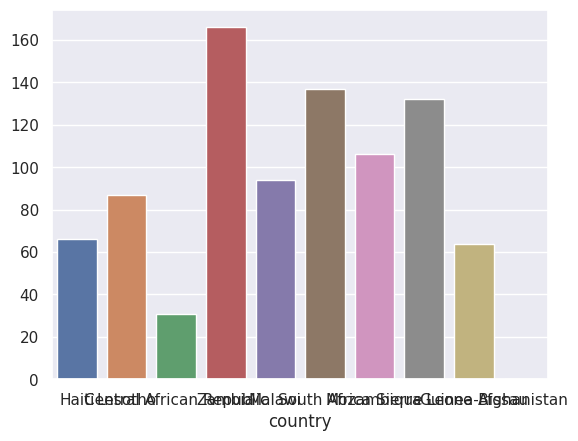

In [46]:
sns.barplot(x=country_life_expec['country'],y=country_life_expec.index,data=country_life_expec)

In [47]:
X = df.drop(columns= ['total_fer', 'income', 'country', 'health', 'exports', 'imports'])

In [48]:
X.columns

Index(['child_mort', 'inflation', 'life_expec', 'gdpp'], dtype='object')

In [50]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(X)

In [49]:
from sklearn.cluster import KMeans


In [51]:
#WCSS

w=[]
for i in range (1,8):
    kmeans=KMeans(n_clusters=i,random_state=40)
    kmeans.fit(x)
    w.append(kmeans.inertia_)
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

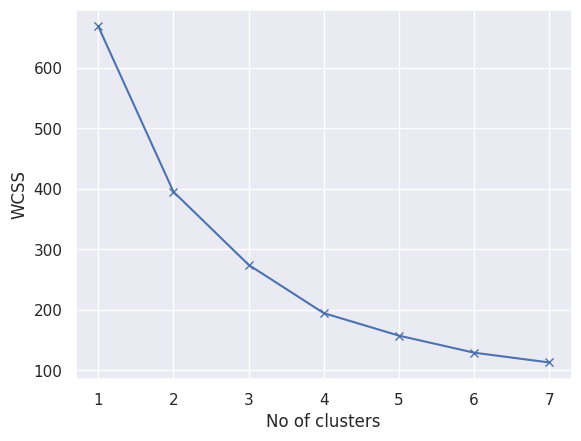

In [54]:
plt.plot(range(1,8),w,'x-')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

In [55]:
kmeans_cluster=KMeans(4)
kmeans_cluster.fit(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [59]:
cluster_data_kmeans=X.copy()
cluster_data_kmeans['cluster_pred']=kmeans_cluster.fit_predict(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
cluster_data_kmeans.head()

,child_mort,inflation,life_expec,gdpp,cluster_pred
0,90.2,9.44,56.2,553,0
1,16.6,4.49,76.3,4090,2
2,27.3,16.10,76.5,4460,2
3,119.0,22.40,60.1,3530,0
4,10.3,1.44,76.8,12200,2


In [61]:
kmeans_cluster.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 3, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

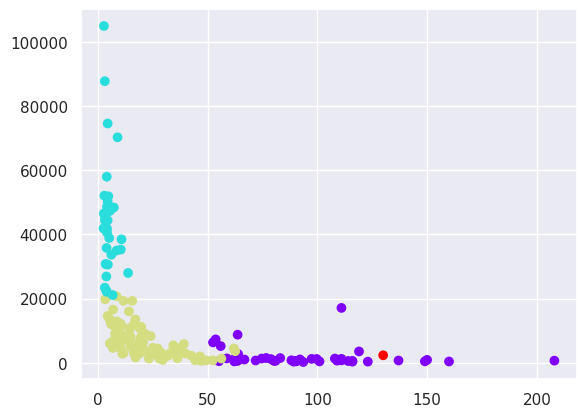

In [64]:
plt.scatter(df['child_mort'],df['gdpp'],c=cluster_data_kmeans['cluster_pred'],cmap='rainbow')

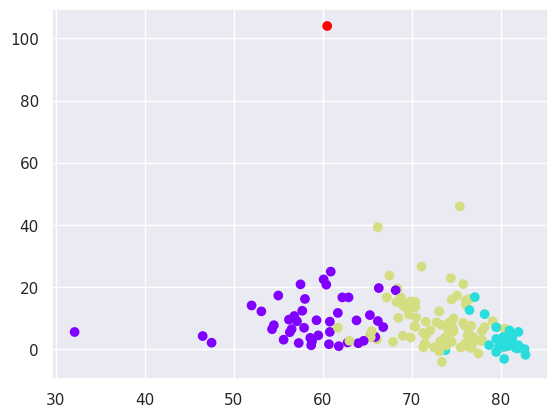

In [66]:
plt.scatter(df['life_expec'],df['inflation'],c=cluster_data_kmeans['cluster_pred'],cmap='rainbow')

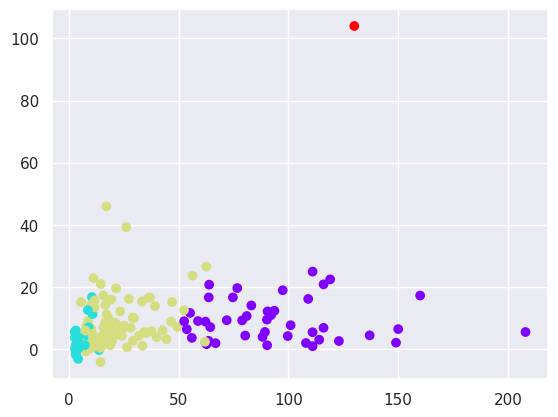

In [67]:
plt.scatter(df['child_mort'],df['inflation'],c=cluster_data_kmeans['cluster_pred'],cmap='rainbow')

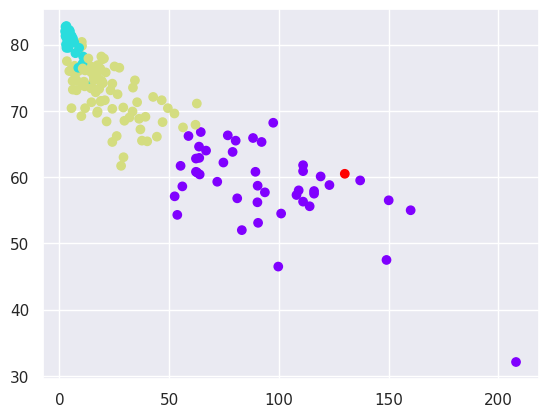

In [68]:
plt.scatter(df['child_mort'],df['life_expec'],c=cluster_data_kmeans['cluster_pred'],cmap='rainbow')

In [70]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [71]:
z=linkage(x,method="ward")

In [73]:
from matplotlib import axes as ax

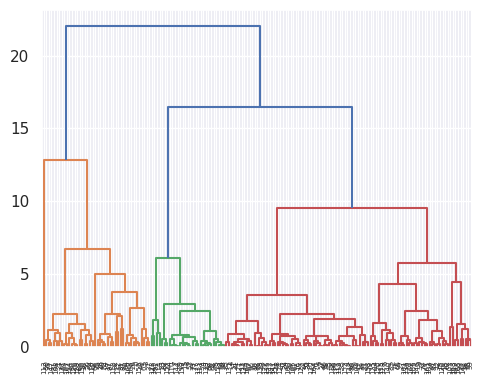

In [74]:
fig,ax=plt.subplots(figsize=(5,4))
ax=dendrogram(z)
plt.tight_layout()
plt.show()


In [78]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [79]:
ag.fit(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [81]:
cluster_data_ag=X.copy()
cluster_data_ag['cluster_pred']=ag.fit_predict(x)
cluster_data_ag.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,child_mort,inflation,life_expec,gdpp,cluster_pred
0,90.2,9.44,56.2,553,0
1,16.6,4.49,76.3,4090,1
2,27.3,16.10,76.5,4460,1
3,119.0,22.40,60.1,3530,0
4,10.3,1.44,76.8,12200,1


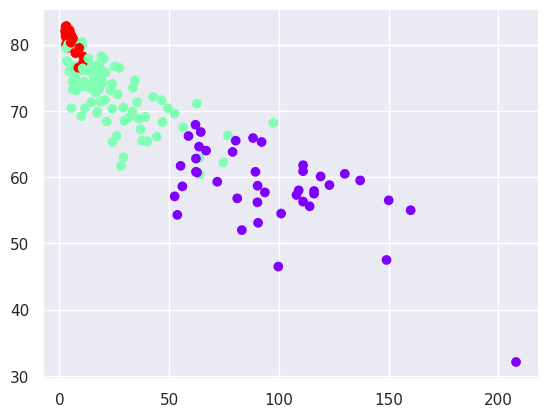

In [82]:
plt.scatter(df['child_mort'],df['life_expec'],c=cluster_data_ag['cluster_pred'],cmap='rainbow')